# Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing data sets
df=pd.read_csv('Slump.csv',sep='\t')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [3]:
#Checking the datas with null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


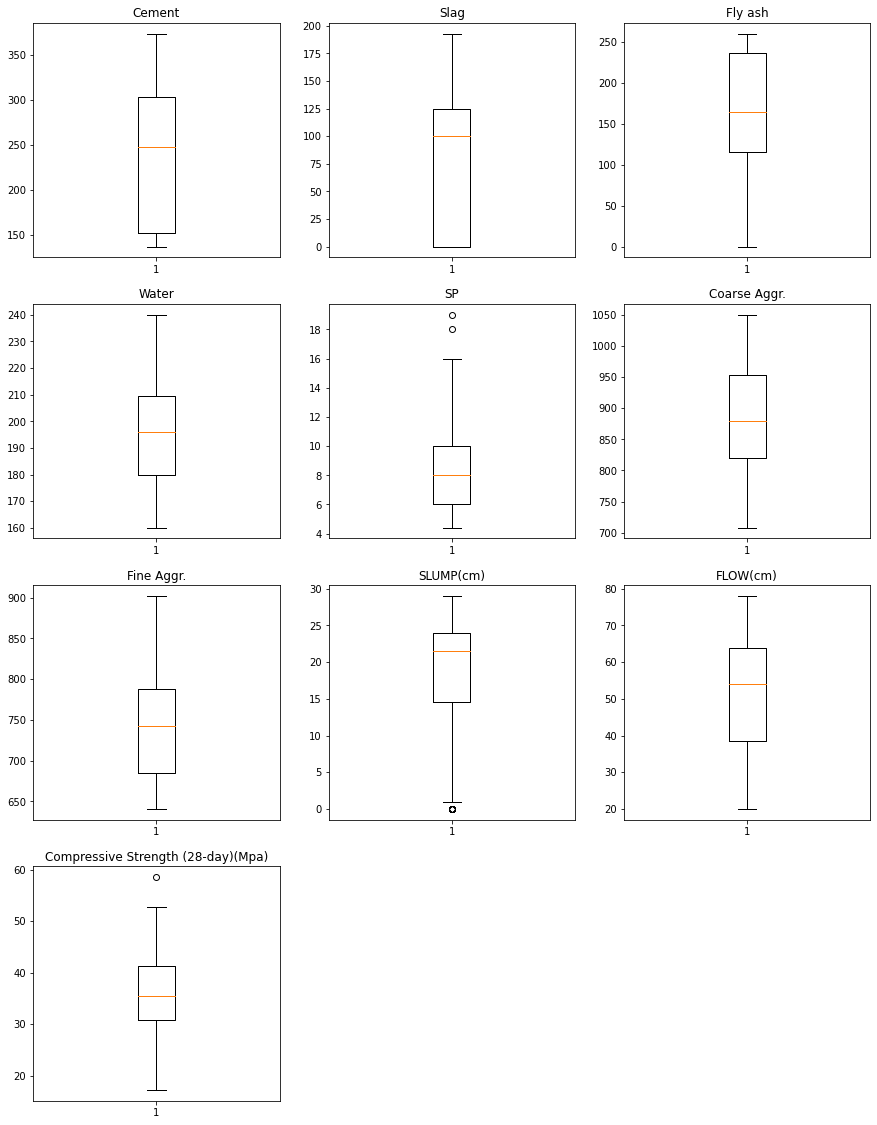

In [4]:
# Checking for the outliers
plt.figure(figsize=(15,25))
count=1
for col in df:
        plt.subplot(5,3,count)
        plt.boxplot(df[col])
        plt.title(col)
        count +=1

In [5]:
#Checking the correlation
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


In [27]:
#Splitting datas into x & y
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [28]:
#Checking for the shape of x & y
print(x.shape)
print(y.shape)

(103, 9)
(103,)


In [29]:
# Reshaping y into single dimension
y=y.reshape(-1,1)
y.shape

(103, 1)

In [30]:
#Importing sklearn to Scaling data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [31]:
# Splitting up x & y into test train data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

82
82
21
21


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
#Creating sets to append results from predicted data
mse=[]
r2=[]
for i in range(1,25):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse_i=mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i=r2_score(y_test,y_pred)
    r2.append(r2_i)
print(mse)

[33.42627619047618, 14.790475, 24.29631058201058, 21.189682738095232, 24.797796190476188, 25.134437433862434, 25.702923712342074, 31.810757886904746, 36.67058677248675, 38.36152766666665, 41.147466115702464, 40.79253419312169, 39.98897999436461, 39.23065070456755, 39.34115608465608, 39.4736892299107, 37.78357652001976, 38.11291653439154, 39.75999261311171, 42.13142499999999, 43.393349065975585, 44.44404279811098, 44.542381627509215, 46.573151521164014]


# MSE V/S K Value

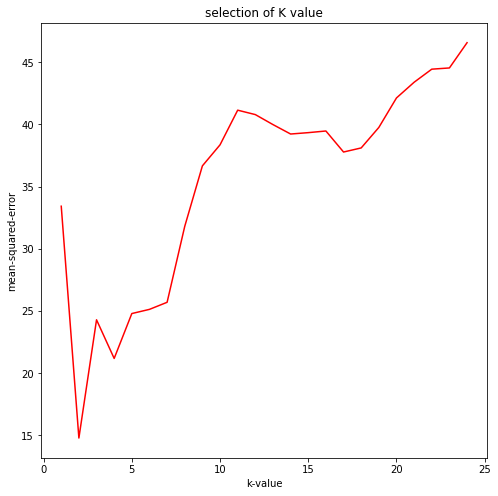

In [60]:
#visualising data to pick perfect K value
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,25),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('selection of K value')
plt.show()


In [61]:
#Checking for the y prediction value
model=KNeighborsRegressor(n_neighbors=2)
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [62]:
# Checking the r2_score
r2_score(y_test,y_pred)

0.7990305041992478